### 1) Importamos nuestras librerias y la data

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datito/data1.csv', index_col=0)

### 2) Exploramos nuestra data

In [242]:
data.head()
#data.info()
#data.describe()
#data.dtypes


,Costo,Descuento,Peso,Tiempo_Exacto
ID,,,,
1,177,44,1233,1
2,216,59,3088,1
3,183,48,3374,1
4,176,10,1177,1
5,184,46,2484,1


Verificamos como se encunetran distribuidos nuestras variables

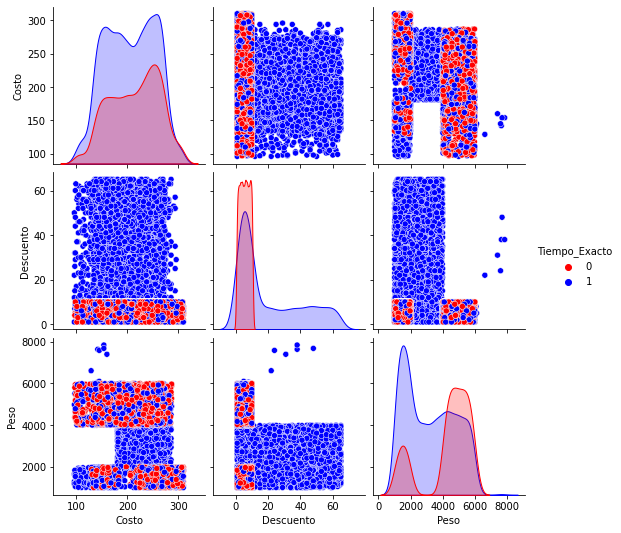

In [243]:
sns.pairplot(data, hue="Tiempo_Exacto", palette = ['r', 'b'])
plt.show()

### 3) Preparamos las variables que relacionaremos 

In [244]:
y = data['Tiempo_Exacto']
X = data[['Descuento', 'Peso', 'Costo']]

In [245]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### 4) Separamos la data en train y test y escalamos la data
Separamos la data para poder hacer el entrenamiento y el testeo

In [246]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

from sklearn.preprocessing import RobustScaler # StandardScaler para escalar los datos

sc_X = RobustScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

### 5) Elaboramos el modelo de SVM, entrenamos el modelo y la predicción

In [247]:
from sklearn.svm import SVC 

svc = SVC(kernel='rbf', gamma=0.01, C=0.1, random_state=0,) 
# C es el parámetro de regularización, si es muy grande, el modelo es más rígido
# gamma es el parámetro de la función de kernel, si es muy grande, el modelo es más rígido
# kernel es el tipo de kernel, puede ser lineal, polinomial, gaussiano, etc.
# random_state es la semilla para la generación de números aleatorios

In [248]:
svc.fit(X_Train, y_train)

SVC(C=0.1, gamma=0.01, random_state=0)

In [249]:
y_pred = svc.predict(X_Test)

### 6) Evaluamos los indicadores del modelo

In [250]:
from sklearn.metrics import recall_score

print("El recall del modelo es: ", recall_score(y_test,y_pred))

El recall del modelo es:  0.9003412969283277


In [251]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('la matriz de confusión es: \n', matriz)

la matriz de confusión es: 
 [[ 154  631]
 [ 146 1319]]


In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.20      0.28       785
           1       0.68      0.90      0.77      1465

    accuracy                           0.65      2250
   macro avg       0.59      0.55      0.53      2250
weighted avg       0.62      0.65      0.60      2250



### 5) Graficamos 

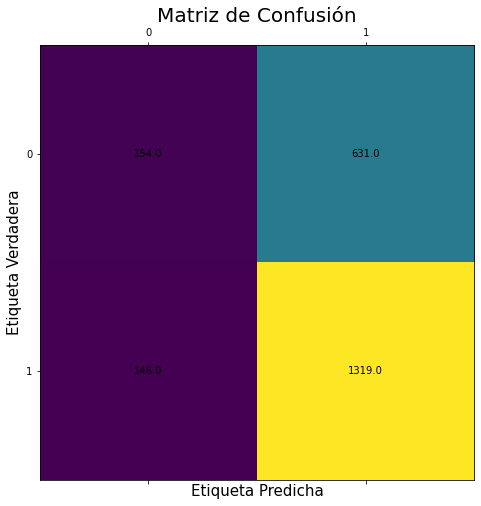

In [253]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## Optimizando los hiperparametros

In [254]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

Creamos el modelo

In [255]:
svc = SVC()

from sklearn.model_selection import GridSearchCV

model = GridSearchCV(svc, param_grid=param_grid, refit=True, cv=5, scoring='f1')

model.fit(X_Train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring='f1')

In [256]:
print("Mejores hiperparámetros: "+str(model.best_params_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')
print('El recall del modelo es: ', recall_score(y_test, model.predict(X_test)))

Mejores hiperparámetros: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

Mejor Score: 0.7727966851149941



c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


El recall del modelo es:  1.0


In [257]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.237284,0.048259,0.462122,0.034489,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.751938,0.697772,0.728028,0.749669,0.736775,0.732836,0.019577,2
1,1.328154,0.039599,0.477730,0.017148,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.742254,0.706275,0.721400,0.749177,0.728836,0.729588,0.015201,5
2,1.353359,0.046525,0.512367,0.001412,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.773285,0.771050,0.773285,0.773285,0.773079,0.772797,0.000877,1
3,1.258700,0.036312,0.422498,0.005416,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.753783,0.702741,0.714894,0.748133,0.729138,0.729738,0.019319,4
4,1.207869,0.025001,0.451909,0.009231,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.748858,0.700473,0.724230,0.754839,0.735043,0.732689,0.019324,3
5,1.384184,0.013971,0.503963,0.043451,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.738786,0.701872,0.721024,0.746544,0.729318,0.727509,0.015441,8
6,1.474050,0.037947,0.415890,0.007742,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.749652,0.697641,0.711111,0.748966,0.721221,0.725718,0.020665,9
7,1.252093,0.017366,0.442510,0.006048,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.746684,0.694250,0.719834,0.752148,0.734828,0.729549,0.020845,6
8,1.290115,0.026810,0.452929,0.004500,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.741765,0.704000,0.723005,0.744277,0.729676,0.728545,0.014538,7


In [258]:
#Predecimos en los datos de test con el mejor modelo obtenido
prediction = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction)

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


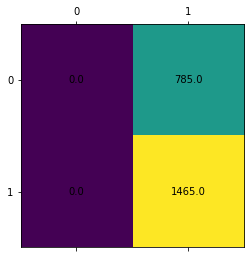

In [259]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [260]:
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_test, prediction))

# Reporte de Clasificacion
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Recall: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       785
           1       0.65      1.00      0.79      1465

    accuracy                           0.65      2250
   macro avg       0.33      0.50      0.39      2250
weighted avg       0.42      0.65      0.51      2250



c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Mandamos a crear las predicciones para la data de testeo

In [261]:
datito = pd.read_excel('E-Commerce_test.xlsx')

# Vamos a renombrar las columnas para que sean más fáciles de entender

datito.columns = ['ID', 'Almacen', 'Medio_Transporte', 'Llamadas_Atencion', 'Puntaje_Cliente', 'Costo', 
                'Compras_Previas', 'Nivel_Importancia', 'Genero_Cliente', 'Descuento', 'Peso']

datito.set_index('ID', inplace=True)

In [262]:
datito = datito[['Descuento', 'Peso', 'Costo']]
X_test = datito

y_pred = svc.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# crear un dataframe con los resultados

y_pred = pd.DataFrame(y_pred, columns=['pred'])

In [ ]:
# Exportar el dataframe a un archivo csv sin el índice

y_pred.to_csv('ELKI-PARIONA-ROJAS.csv', index=False)